In [ ]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

In [ ]:
df.head(7)
df.tail(7)
df.info()
df.describe()
df.nlargest(10, 'Glucose')[['Glucose', 'BMI', 'Age', 'Outcome']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Glucose,BMI,Age,Outcome
661,199,42.9,22,1
561,198,41.3,28,1
8,197,30.5,53,1
228,197,36.7,31,0
408,197,25.9,39,1
579,197,34.7,62,1
22,196,39.8,41,1
206,196,37.5,57,1
359,196,36.5,29,1
498,195,25.1,55,1


In [ ]:
import numpy as np

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

print("Shape:", X.shape)
print("Mean:", np.mean(X, axis=0))
print("Std:", np.std(X, axis=0))

Shape: (768, 8)
Mean: [  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542]
Std: [  3.36738361  31.95179591  19.34320163  15.94182863 115.16894926
   7.87902573   0.33111282  11.75257265]


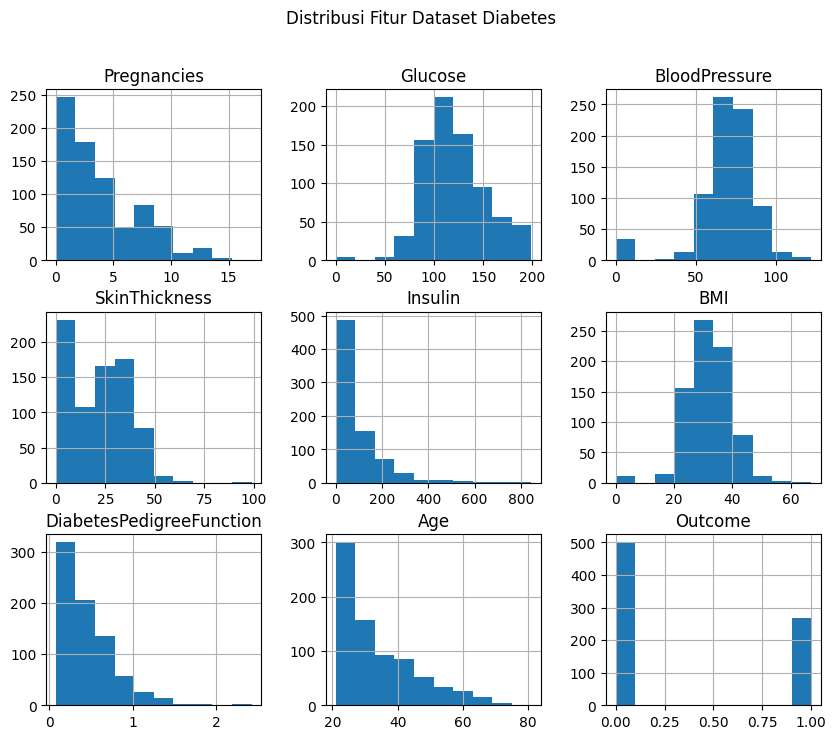

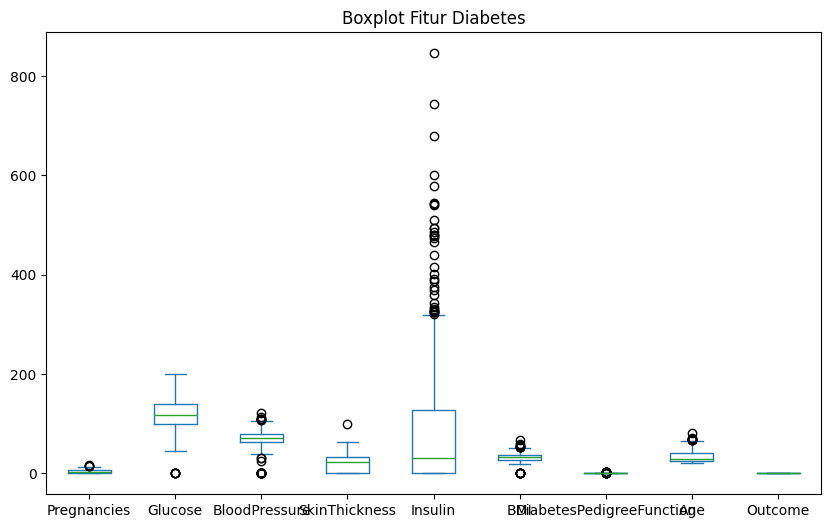

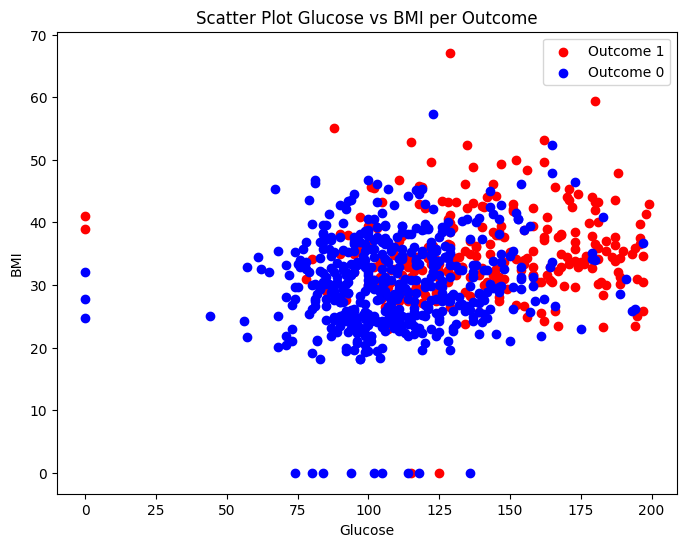

In [ ]:
import matplotlib.pyplot as plt

# Histogram
df.hist(figsize=(10, 8))
plt.suptitle("Distribusi Fitur Dataset Diabetes")
plt.show()

# Boxplot
df.plot(kind='box', figsize=(10, 6), title='Boxplot Fitur Diabetes')
plt.show()

# Scatter Glucose vs BMI per Outcome
colors = {0: 'blue', 1: 'red'}
plt.figure(figsize=(8,6))
for outcome in df['Outcome'].unique():
    subset = df[df['Outcome'] == outcome]
    plt.scatter(subset['Glucose'], subset['BMI'], label=f'Outcome {outcome}', color=colors[outcome])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.title('Scatter Plot Glucose vs BMI per Outcome')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluasi
print("=== Dummy Classifier ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dummy))
print(confusion_matrix(y_test, y_pred_dummy))
print(classification_report(y_test, y_pred_dummy))

print("\n=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


=== Dummy Classifier ===
Akurasi: 0.6493506493506493
[[100   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154


=== Logistic Regression ===
Akurasi: 0.7142857142857143
[[82 18]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
